# ROC-AUC

https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/

$$FRP = \frac{FP}{negative}$$ 

$$TRP = \frac{TP}{positive}  \space (= recall)$$ 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# генерируем данные 
X, y = make_classification(n_samples=100000, n_features=20, 
                           n_classes=2, n_informative=5, 
                           n_redundant=2, random_state=42)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

(100000, 20) (100000,)


In [3]:
# классы сбалансированы
y_train.mean()

0.4998714285714286

In [4]:
# обучим классификатор
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [5]:
y_pred = xgb.predict_proba(X_test)

In [31]:
# вероятность принадлежности к классу 1 - второй столбец - то, что нам нужно
y_pred[:, 1]

array([0.00797739, 0.29839823, 0.0193131 , ..., 0.00694505, 0.98824626,
       0.9875129 ], dtype=float32)

In [17]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

# Danger zone: передадим в roc-auc не вероятности, а классы 
(не делайте так)

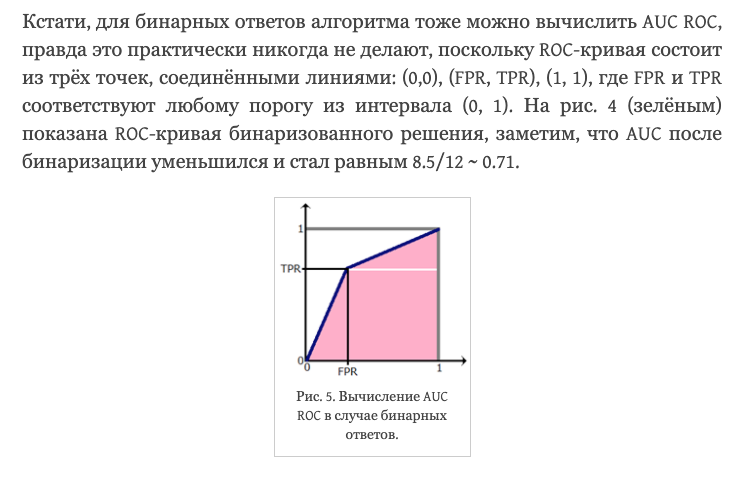

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
# вероятности
y_pred_proba = y_pred[:, 1]

In [34]:
# классы как вероятности + трешхолд
th = 0.5
y_pred_class = (y_pred[:, 1] > th).astype(int)
y_pred_class

array([0, 0, 0, ..., 0, 1, 1])

### roc_auc_score здорового человека

In [35]:
# передаем вероятности
roc_auc_score(y_test, y_pred_proba)

0.9780587762175129

### roc_auc_score курильщика

In [36]:
# не делайте так (не передавайте классы в roc_auc), хотя это теоретически и работает
roc_auc_score(y_test, y_pred_class)

0.9320057551648537

# Нарисуем

0.9780587762175129


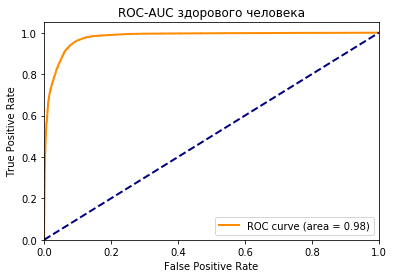

In [37]:
from sklearn.metrics import auc, roc_curve 

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC здорового человека')
plt.legend(loc="lower right")
plt.show()

0.9320057551648537


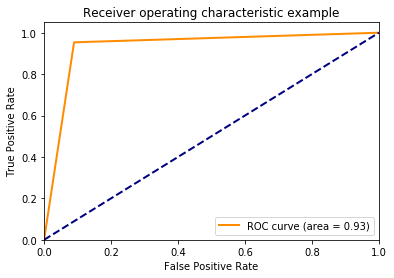

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred_class)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()